# Praxisprojekt - Preprocessing und Visualisierung von Wetterdaten 
Wetterdaten vom 01.01.2015 - 21.12.2022 in Düsseldorf
Link: https://meteostat.net/de/place/de/dusseldorf?s=10400&t=2015-01-01/2022-12-31 - abgerufen 01.05.2023

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Daten einlesen und anzeigen

In [20]:
monatsnamen = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']
df = pd.read_csv('wetterdaten2015-2022.csv')

In [21]:
df.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228


## Datenaufbereitung
### Neue Spalten anlegen -> Jahr, Tag und Monat trennen

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['Jahr'] = df['date'].dt.year
df['Monat'] = df['date'].dt.month
df['Tag'] = df['date'].dt.day


In [24]:
df.head(10)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Jahr,Monat,Tag
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318,2015,1,1
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132,2015,1,2
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0,2015,1,3
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378,2015,1,4
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228,2015,1,5
5,2015-01-06,2.7,0.3,5.0,1.6,0.0,166.0,14.8,32.8,1024.5,114,2015,1,6
6,2015-01-07,4.0,2.0,6.9,3.7,0.0,222.0,16.2,38.9,1028.1,348,2015,1,7
7,2015-01-08,5.7,2.6,9.1,20.9,0.0,193.0,22.0,48.6,1023.2,0,2015,1,8
8,2015-01-09,8.9,5.1,14.2,6.7,0.0,228.0,29.5,80.6,1019.7,0,2015,1,9
9,2015-01-10,10.9,3.7,14.4,3.1,0.0,254.0,34.2,79.2,1013.0,0,2015,1,10


### Wochenname & Monatsname hinzufügen

In [25]:
df['Wochentag'] = df['date'].dt.day_name(locale='de_DE.UTF-8')
df['Monatsname'] = df['date'].dt.month_name(locale='de_DE.UTF-8')

In [26]:
df.head(10)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Jahr,Monat,Tag,Wochentag,Monatsname
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318,2015,1,1,Donnerstag,Januar
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132,2015,1,2,Freitag,Januar
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0,2015,1,3,Samstag,Januar
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378,2015,1,4,Sonntag,Januar
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228,2015,1,5,Montag,Januar
5,2015-01-06,2.7,0.3,5.0,1.6,0.0,166.0,14.8,32.8,1024.5,114,2015,1,6,Dienstag,Januar
6,2015-01-07,4.0,2.0,6.9,3.7,0.0,222.0,16.2,38.9,1028.1,348,2015,1,7,Mittwoch,Januar
7,2015-01-08,5.7,2.6,9.1,20.9,0.0,193.0,22.0,48.6,1023.2,0,2015,1,8,Donnerstag,Januar
8,2015-01-09,8.9,5.1,14.2,6.7,0.0,228.0,29.5,80.6,1019.7,0,2015,1,9,Freitag,Januar
9,2015-01-10,10.9,3.7,14.4,3.1,0.0,254.0,34.2,79.2,1013.0,0,2015,1,10,Samstag,Januar


### Spaltennamen umbenennen

In [27]:
df.rename(columns={'date': 'Datum','tavg': 'Durchschnittstemperatur', 'tmin': 'Min_Temperatur', 'tmax': 'Max_Temperatur', 'prcp': 'Gesamtniederschlag', 'snow': 'Schneehöhe', 'wdir': 'Windrichtung', 'wspd': 'Windgeschwindigkeit', 'wpgt': 'Spitzenhöhe', 'pres': 'Luftdruck', 'tsun': 'Sonnenscheindauer'}, inplace=True)

In [28]:
df.head(10)

,Datum,Durchschnittstemperatur,Min_Temperatur,Max_Temperatur,Gesamtniederschlag,Schneehöhe,Windrichtung,Windgeschwindigkeit,Spitzenhöhe,Luftdruck,Sonnenscheindauer,Jahr,Monat,Tag,Wochentag,Monatsname
0,2015-01-01,1.7,-2.3,5.5,2.8,0.0,176.0,15.8,41.8,1034.6,318,2015,1,1,Donnerstag,Januar
1,2015-01-02,5.6,1.7,8.8,1.1,0.0,227.0,20.9,44.6,1028.1,132,2015,1,2,Freitag,Januar
2,2015-01-03,2.7,0.4,4.4,4.2,0.0,210.0,13.3,40.0,1025.2,0,2015,1,3,Samstag,Januar
3,2015-01-04,2.7,-1.5,6.4,0.0,0.0,266.0,11.5,26.3,1033.3,378,2015,1,4,Sonntag,Januar
4,2015-01-05,2.7,-0.8,4.7,0.0,0.0,204.0,11.9,25.9,1033.4,228,2015,1,5,Montag,Januar
5,2015-01-06,2.7,0.3,5.0,1.6,0.0,166.0,14.8,32.8,1024.5,114,2015,1,6,Dienstag,Januar
6,2015-01-07,4.0,2.0,6.9,3.7,0.0,222.0,16.2,38.9,1028.1,348,2015,1,7,Mittwoch,Januar
7,2015-01-08,5.7,2.6,9.1,20.9,0.0,193.0,22.0,48.6,1023.2,0,2015,1,8,Donnerstag,Januar
8,2015-01-09,8.9,5.1,14.2,6.7,0.0,228.0,29.5,80.6,1019.7,0,2015,1,9,Freitag,Januar
9,2015-01-10,10.9,3.7,14.4,3.1,0.0,254.0,34.2,79.2,1013.0,0,2015,1,10,Samstag,Januar


## Datenanalyse
### 1) Durchschnittstemperatur nach Jahr und Monat

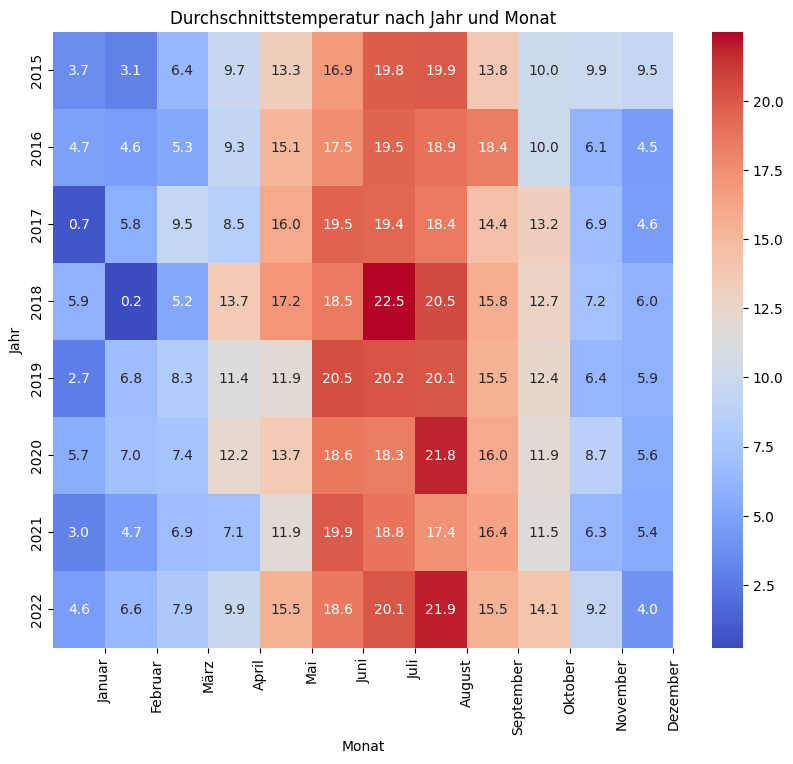

In [29]:
df_pivot = df.pivot_table(values='Durchschnittstemperatur', index='Jahr', columns='Monat', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(data=df_pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.xlabel('Monat')
plt.ylabel('Jahr')
plt.title('Durchschnittstemperatur nach Jahr und Monat')
plt.xticks(ticks=range(1, 13), labels=monatsnamen, rotation=90)

plt.show()

### 2) Maximale Temperatur nach Jahr und Monat

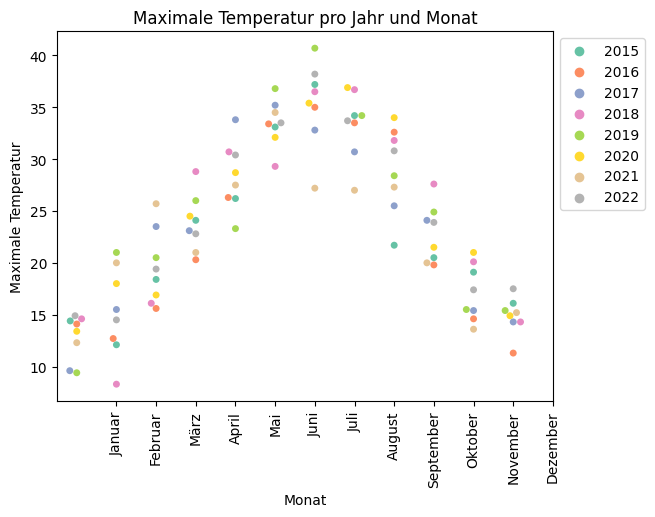

In [30]:
df_groupedMax = df.groupby(['Jahr', 'Monat'])['Max_Temperatur'].max().reset_index()

sns.swarmplot(data=df_groupedMax,x='Monat', y='Max_Temperatur', palette='Set2', hue="Jahr")
plt.title('Maximale Temperatur pro Jahr und Monat')
plt.xlabel('Monat')
plt.ylabel('Maximale Temperatur')
plt.xticks(ticks=range(1, 13), labels=monatsnamen, rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### 3) Minimale Temperatur nach Jahr und Monat

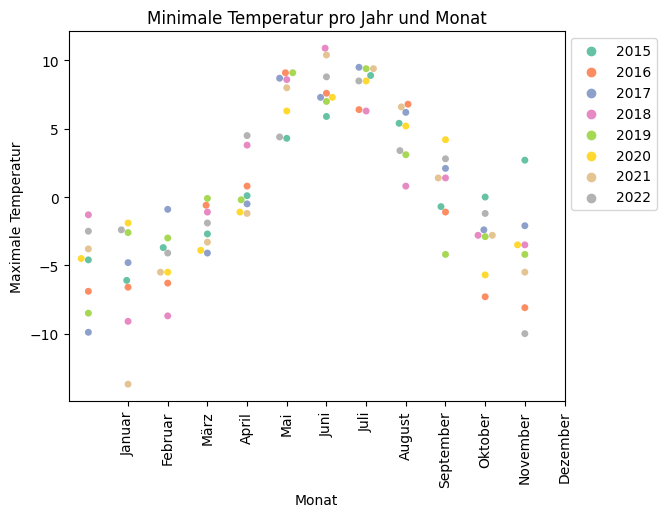

In [31]:
df_groupedMin = df.groupby(['Jahr', 'Monat'])['Min_Temperatur'].min().reset_index()

sns.swarmplot(data=df_groupedMin,x='Monat', y='Min_Temperatur', palette='Set2', hue="Jahr")
plt.title('Minimale Temperatur pro Jahr und Monat')
plt.xlabel('Monat')
plt.ylabel('Maximale Temperatur')
plt.xticks(ticks=range(1, 13), labels=monatsnamen, rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

### 4) Häufigkeitsverteilung -> Windrichtung

In [32]:
def grad_zu_himmelsrichtung(grad):
    if grad >= 337.5 or grad < 22.5:
        return 'Nord'
    elif grad >= 22.5 and grad < 67.5:
        return 'Nordost'
    elif grad >= 67.5 and grad < 112.5:
        return 'Ost'
    elif grad >= 112.5 and grad < 157.5:
        return 'Südost'
    elif grad >= 157.5 and grad < 202.5:
        return 'Süd'
    elif grad >= 202.5 and grad < 247.5:
        return 'Südwest'
    elif grad >= 247.5 and grad < 292.5:
        return 'West'
    else:
        return 'Nordwest'

In [33]:
df['Himmelsrichtung'] = df['Windrichtung'].apply(grad_zu_himmelsrichtung)
himmelsrichtung = df['Himmelsrichtung'].value_counts() 

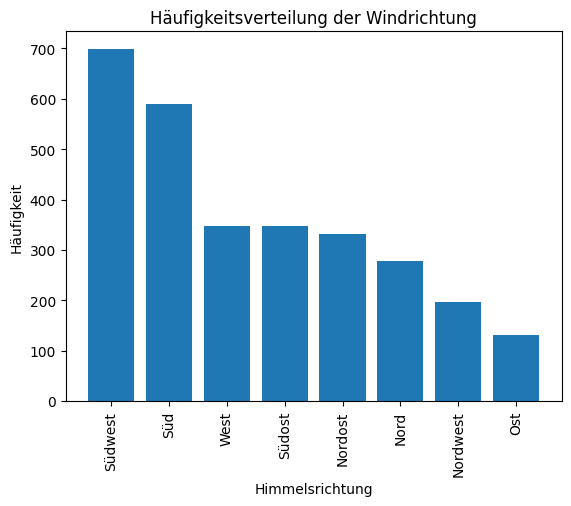

In [34]:
plt.bar(himmelsrichtung.index, himmelsrichtung.values)
plt.xlabel('Himmelsrichtung')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeitsverteilung der Windrichtung')
plt.xticks(rotation=90)
plt.show()